In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import datetime64
import os


In [98]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
print(df)


[        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]]


In [118]:
# Extract dataframe from list and convert 'terrestrial_date' to the datetime datatype. Export dataframe as a csv to 'marsdata.csv'
mars_df= df[0]

mars_df.dtypes
mars_df['terrestrial_date'] = pd.to_datetime(mars_df.terrestrial_date)

mars_df.to_csv('marsdata.csv', index=False, header=True)
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [34]:
# Months in the dataframe

mars_df.month.unique()

# Answer: there are 12 months 

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [36]:

# Number of sol (Martian) days in the dataset

mars_df.sol.count()
mars_df.sol.nunique()


1867

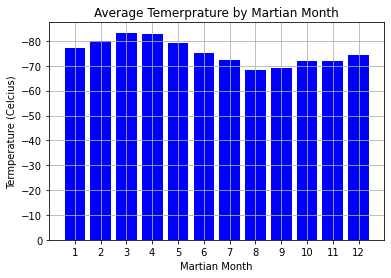

In [115]:
# Coldest and warmest months on Mars (at the location of Curiosity.

mars_temps = mars_df.groupby('month').mean()
mars_temps.sort_values(by=['min_temp'])

## ----------  Hottest months: 3 and 4 ------------ ##
## ----------  Coldest months: 8 and 9 ------------ ##

mars_temps = mars_df.groupby('month').mean()
mars_temps.sort_values(by=['min_temp'])

plt.bar(mars_temps.index, mars_temps['min_temp'], color="b", align="center")
plt.title("Average Temerprature by Martian Month")
plt.xlabel("Martian Month")
plt.ylabel("Termperature (Celcius)")
plt.gca().invert_yaxis()
plt.grid()
tick_locations = [value for value in mars_temps.index]
plt.xticks(tick_locations, mars_temps.index)
plt.show()


In [101]:
# Highest and lowest atmospheric pressure months on Mars (at the location of Curiosity.


## ----------  Highest pressure months: 2 and 9 ------------ ##
## ----------  Lowest pressure months: 5 and 6 ------------  ##

,id,sol,ls,min_temp,pressure
month,,,,,
6,735.306122,750.829932,164.897959,-75.299320,745.054422
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
7,714.549296,715.105634,194.894366,-72.281690,795.105634
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
12,931.602410,990.951807,344.692771,-74.451807,842.156627
11,874.246377,947.224638,314.536232,-71.985507,857.014493
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
8,718.078014,795.333333,224.347518,-68.382979,873.829787
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917


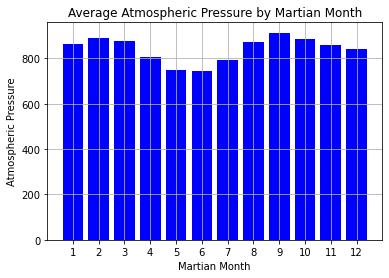

In [116]:
plt.bar(mars_temps.index, mars_temps['pressure'], color="b", align="center")
plt.title("Average Atmospheric Pressure by Martian Month")
plt.xlabel("Martian Month")
plt.ylabel("Atmospheric Pressure")
tick_locations = [value for value in mars_temps.index]
plt.grid()
plt.xticks(tick_locations, mars_temps.index)
plt.show()


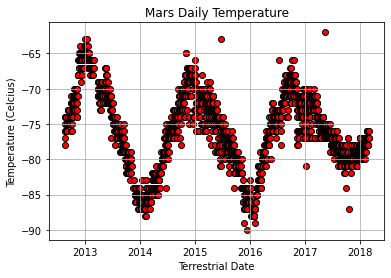

In [117]:
# Scatterplot to show daily temps over time

plt.scatter(mars_df['terrestrial_date'], mars_df['min_temp'], marker="o", facecolors="red", edgecolors="black")
plt.title("Mars Daily Temperature")
plt.xlabel("Terrestrial Date")
plt.ylabel("Temperature (Celcius)")
plt.grid()
plt.show()

# By extimating the high temp that is directly over 2013 on the X axis to the next high temp point just before 2015,
# I estimate the number of earth days in the Martian year to be 690, or 30 days less than two full earth years (720 days).